In [69]:
import os
import imgaug
from skimage import io, transform
from skimage import img_as_ubyte
from imgaug import augmenters as iaa
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
import random

In [137]:
SAMPLE_PATH = "data/images/256/final/001_aug0.bmp"
TXT_PATH = "data/images/256/final/001_aug0.txt"

In [138]:
# import sample image
img = img_as_ubyte(io.imread(SAMPLE_PATH, as_gray=True))
x,y = img.shape
SCALE = 15
img_dimmed = np.expand_dims(img, axis=0)

In [139]:

def extract_labels_from_txt(path):
    with open(path, "r") as f:
        # only first 19 are actual coords in dataset label files
        coords_raw = f.readlines()[:18]
        coords_raw = [tuple([int(float(s)) for s in t.split(",")]) for t in coords_raw]
        return coords_raw

In [140]:
coords_raw = extract_labels_from_txt(TXT_PATH)
coords_raw

[(835, 996),
 (1473, 1029),
 (1289, 1279),
 (604, 1228),
 (1375, 1654),
 (1386, 2019),
 (1333, 2200),
 (1263, 2272),
 (1305, 2252),
 (694, 1805),
 (1460, 1870),
 (1450, 1864),
 (1588, 1753),
 (1569, 2013),
 (1514, 1620),
 (1382, 2310),
 (944, 1506),
 (1436, 1569)]

In [141]:
kp_to_list = lambda k_arr: [(p.x, p.y) for p in k_arr]

In [142]:
def list_to_kp(coords_raw):
    kp = []
    for coord in coords_raw:
        kp.append(imgaug.Keypoint(x=coord[0], y=coord[1]))
    keypoints = imgaug.KeypointsOnImage(kp, shape=img.shape)
    return keypoints

In [143]:
keypoints_on_images = [list_to_kp(coords_raw)]

In [144]:
keypoints_on_images

[KeypointsOnImage([Keypoint(x=835.00000000, y=996.00000000), Keypoint(x=1473.00000000, y=1029.00000000), Keypoint(x=1289.00000000, y=1279.00000000), Keypoint(x=604.00000000, y=1228.00000000), Keypoint(x=1375.00000000, y=1654.00000000), Keypoint(x=1386.00000000, y=2019.00000000), Keypoint(x=1333.00000000, y=2200.00000000), Keypoint(x=1263.00000000, y=2272.00000000), Keypoint(x=1305.00000000, y=2252.00000000), Keypoint(x=694.00000000, y=1805.00000000), Keypoint(x=1460.00000000, y=1870.00000000), Keypoint(x=1450.00000000, y=1864.00000000), Keypoint(x=1588.00000000, y=1753.00000000), Keypoint(x=1569.00000000, y=2013.00000000), Keypoint(x=1514.00000000, y=1620.00000000), Keypoint(x=1382.00000000, y=2310.00000000), Keypoint(x=944.00000000, y=1506.00000000), Keypoint(x=1436.00000000, y=1569.00000000)], shape=(2400, 1935))]

In [145]:
#2400, 1935

In [146]:
rs = iaa.Sequential([iaa.Scale({"height":256, "width":256})])
rs_det = rs.to_deterministic()
seq = iaa.Sequential([iaa.Affine(rotate=180)])
seq_det = seq.to_deterministic()

In [147]:
images_rs = rs_det.augment_images(img_dimmed)
keypoints_rs = rs_det.augment_keypoints(keypoints_on_images)
images_aug = seq_det.augment_images(images_rs)
keypoints_aug = seq_det.augment_keypoints(keypoints_rs)

In [148]:
# images_rs = img_dimmed
# keypoints_rs = keypoints_on_images
# images_aug = images_rs
# keypoints_aug = keypoints_rs

In [149]:
keypoints_aug

[KeypointsOnImage([Keypoint(x=145.52972412, y=149.76000977), Keypoint(x=61.12248230, y=146.23999023), Keypoint(x=85.46563721, y=119.57333374), Keypoint(x=176.09095764, y=125.01333618), Keypoint(x=74.08786011, y=79.57333374), Keypoint(x=72.63255310, y=40.63999939), Keypoint(x=79.64443970, y=21.33332825), Keypoint(x=88.90542603, y=13.65333557), Keypoint(x=83.34883118, y=15.78666687), Keypoint(x=164.18397522, y=63.46665955), Keypoint(x=62.84237671, y=56.53334045), Keypoint(x=64.16537476, y=57.17333984), Keypoint(x=45.90800476, y=69.01333618), Keypoint(x=48.42170715, y=41.27999878), Keypoint(x=55.69819641, y=83.19999695), Keypoint(x=73.16175842, y=9.60000610), Keypoint(x=131.10903931, y=95.36000061), Keypoint(x=66.01757812, y=88.63999939)], shape=(256, 256))]

[(110.47028, 106.24), (194.87752, 109.76), (170.53436, 136.42667), (79.90904, 130.98666), (181.91214, 176.42667), (183.36745, 215.36), (176.35556, 234.66667), (167.09457, 242.34666), (172.65117, 240.21333), (91.81602, 192.53334), (193.15762, 199.46666), (191.83463, 198.82666), (210.092, 186.98666), (207.5783, 214.72), (200.3018, 172.8), (182.83824, 246.4), (124.89095, 160.64), (189.98242, 167.36)]


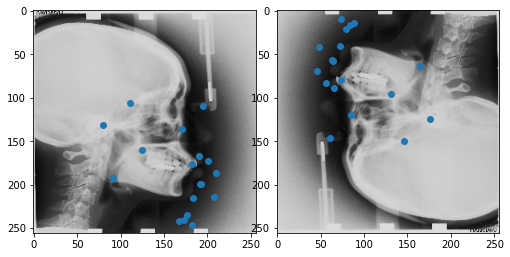

In [150]:
fig = plt.figure()

plt.rcParams["figure.figsize"] = [16,9]
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 1, 1)

ax1.imshow(images_rs[0], cmap="gray")
ax2.imshow(images_aug[0], cmap="gray")

k_orig = kp_to_list(keypoints_rs[0].keypoints)
k_aug = kp_to_list(keypoints_aug[0].keypoints)
print(k_orig)
ax1.scatter(*zip(*k_orig))
ax2.scatter(*zip(*k_aug))
plt.show()